In [1]:
import math,pylab,read_srt
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Part Two

We are in a continuous state of motion.  The Sun is moving in the galaxy with an overall motion that is characteristic of the surrounding stellar group motion.  But we are moving relative to that.  So the VSLR is giving the component of our motion relative to the VSLR for the pencil beam at the time of the observations.
 
Observations in a specific direction will have different VLSR 6 months apart. 

In [2]:
gal = np.genfromtxt("marmot_g60.rad",comments="*",skip_header=10)

az = gal[:,1]
el = gal[:,2]
offset1, offset2 = gal[:,3], gal[:,4]
cfq = gal[:,5]
spacing = gal[:,6]
mode = gal[:,7]
channel = gal[:,8]
data = gal[:,9:-2] 

Text(0, 0.5, 'Temperature (K)')

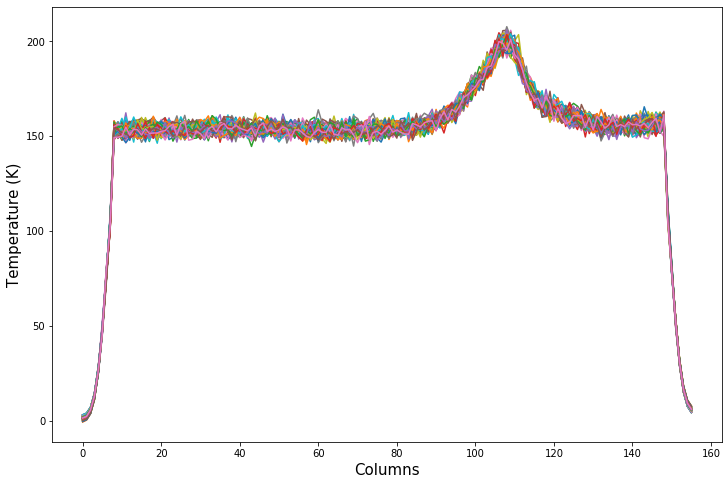

In [3]:
points = np.arange(0,len(data[0,:]))

plt.figure(figsize=(12,8))
for i in range(len(data)):
    plt.plot(points,data[i,:])

plt.xlabel("Columns",fontsize=15)
plt.ylabel("Temperature (K)",fontsize=15)  # peak is HI emission spread out due to doppler effect. 

Text(0, 0.5, 'Temperatures')

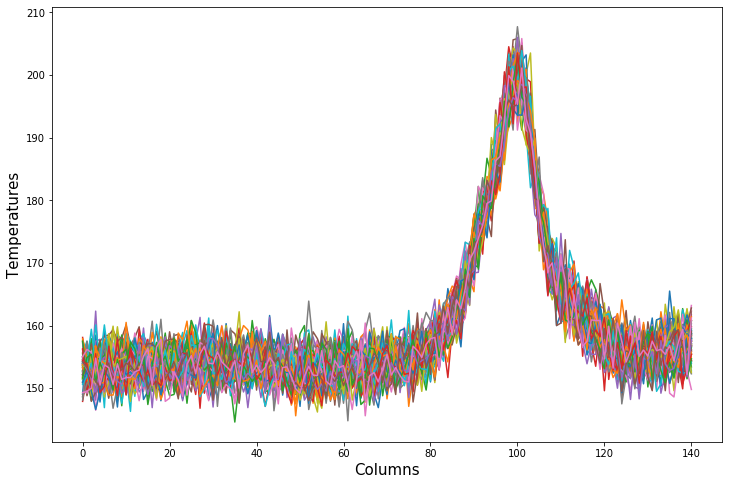

In [4]:
newT = data[:, 8:-7]
points = np.arange(0,len(newT[0,:]))

plt.figure(figsize=(12,8))
for i in range(len(newT)):
    plt.plot(points,newT[i,:])

plt.xlabel("Columns",fontsize=15)
plt.ylabel("Temperatures",fontsize=15)

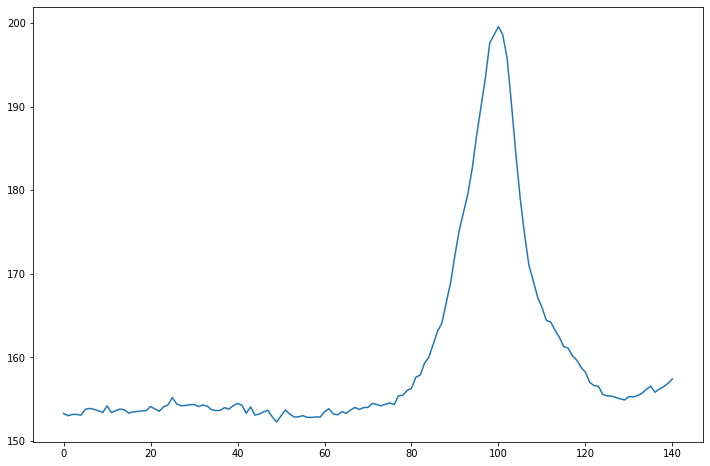

In [5]:
meanTemp = []
for i in range(len(newT[0,:])):
    meanTemp.append(np.mean(newT[:,i]))

plt.figure(figsize=(12,8))
plt.plot(points,meanTemp)

# All plots from for loop

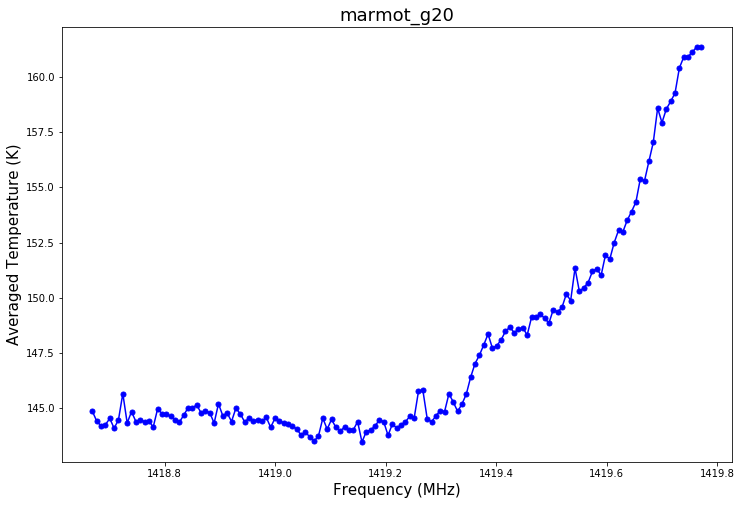

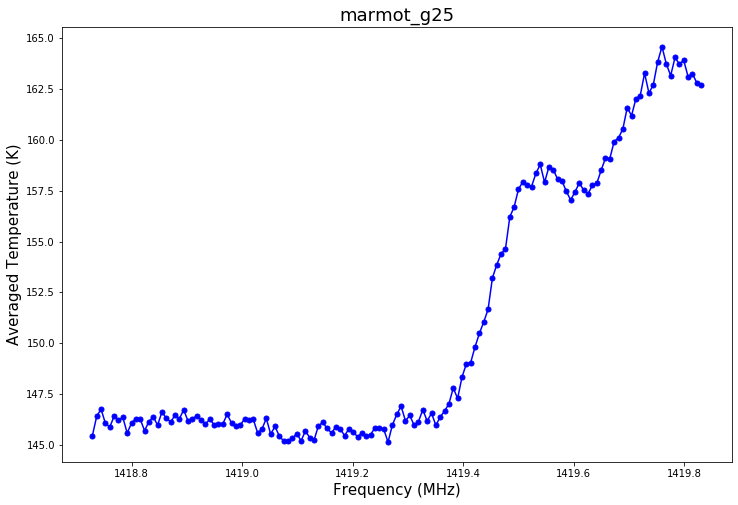

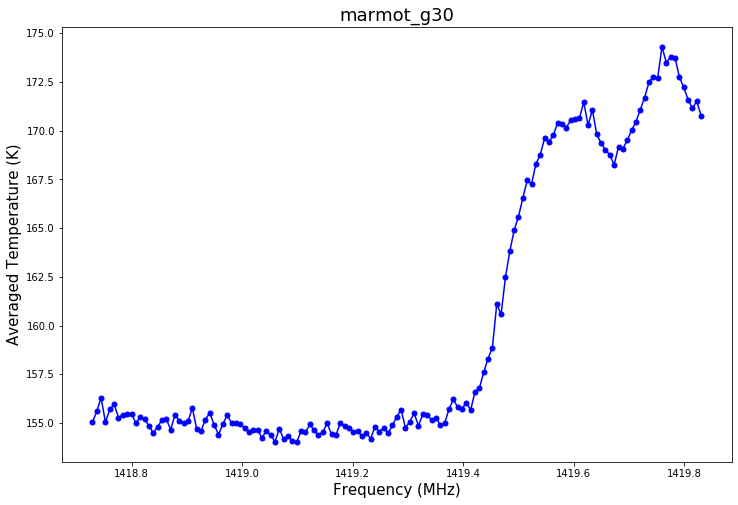

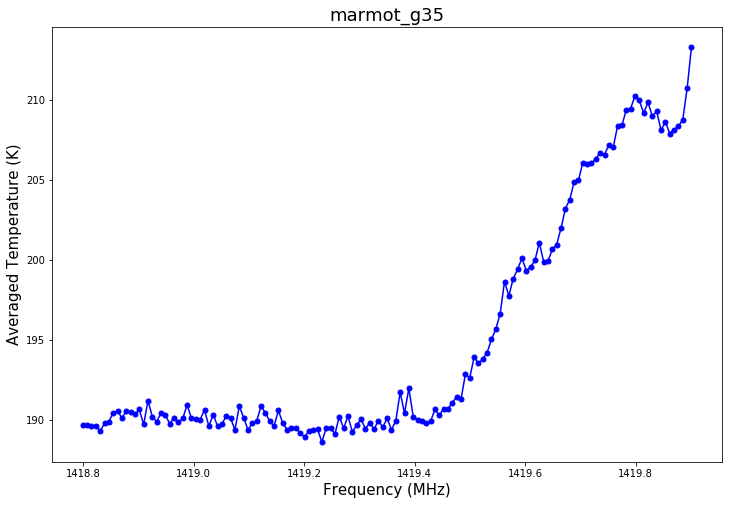

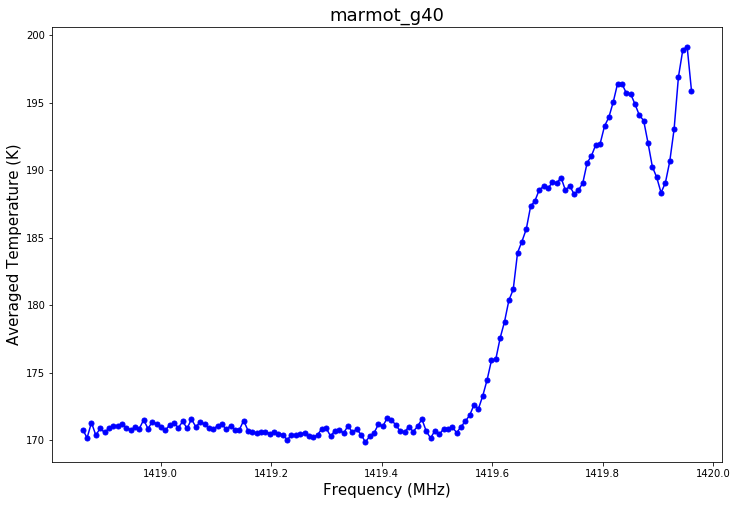

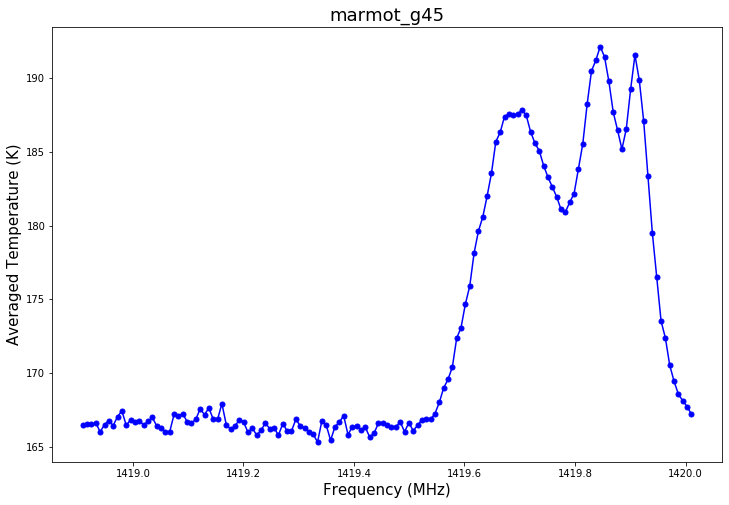

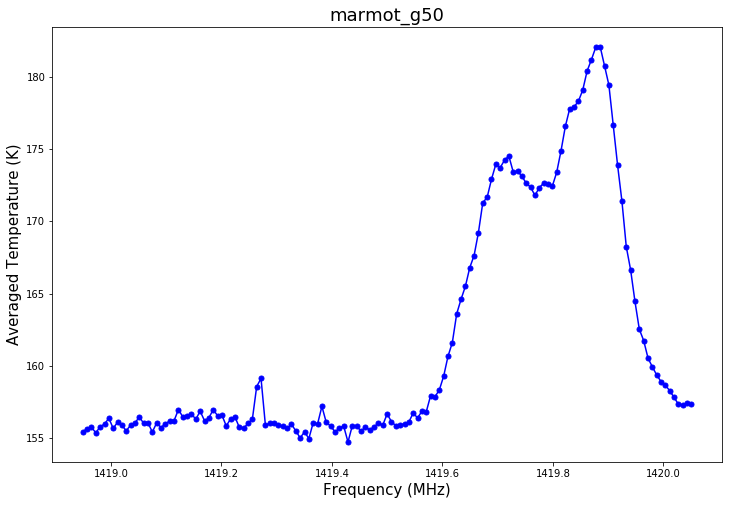

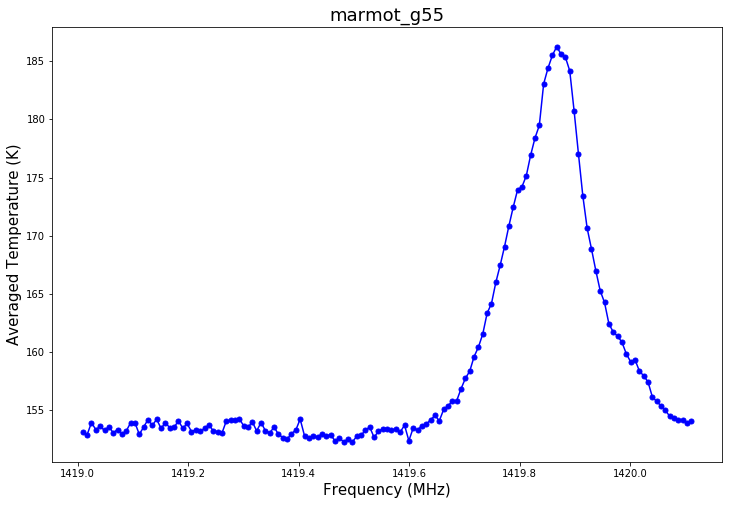

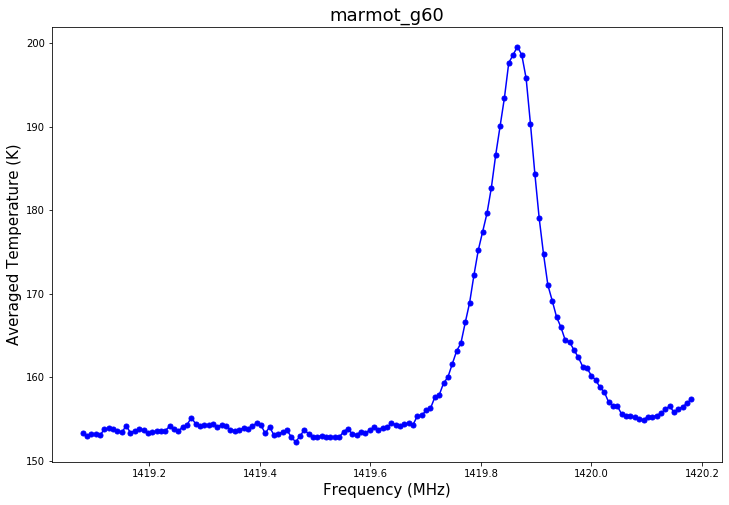

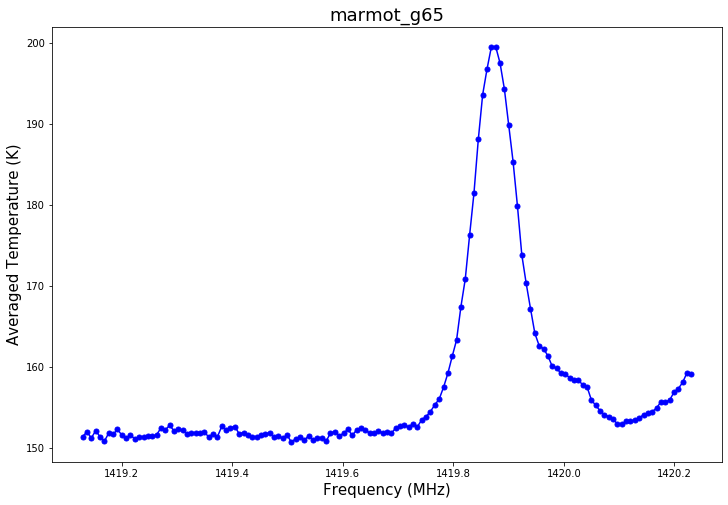

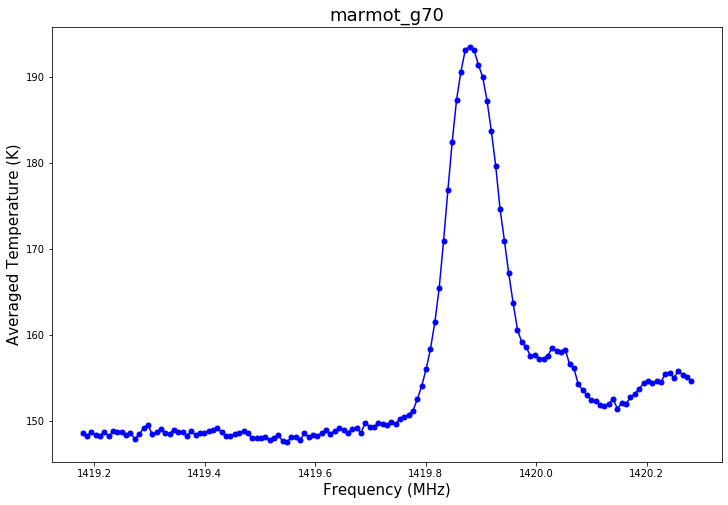

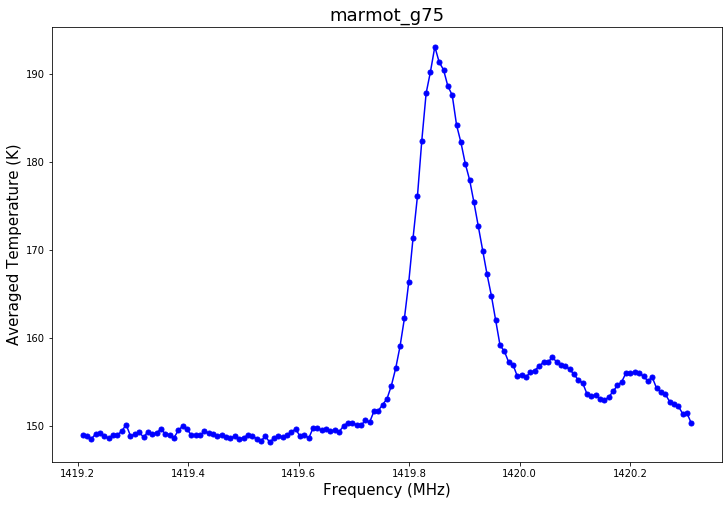

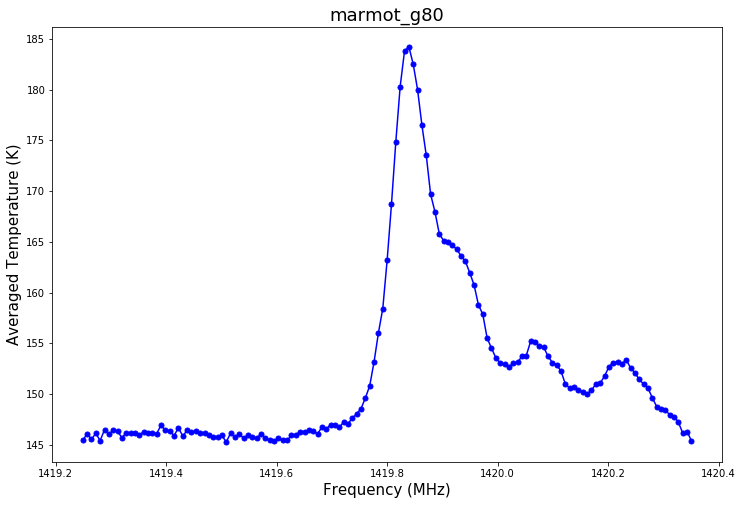

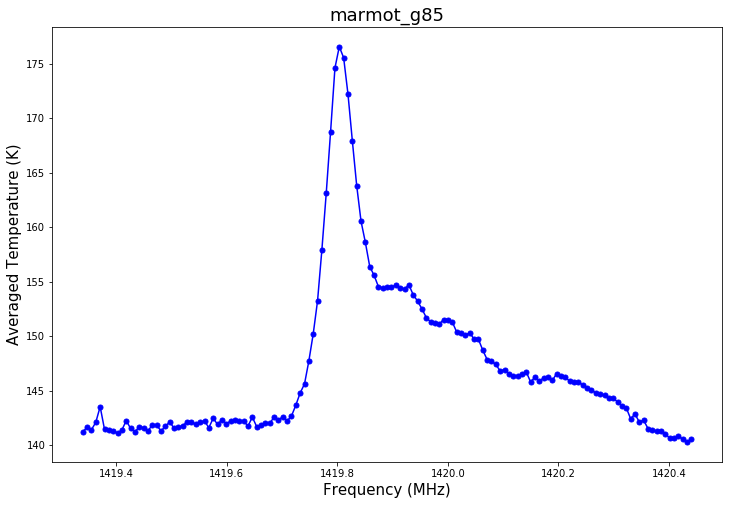

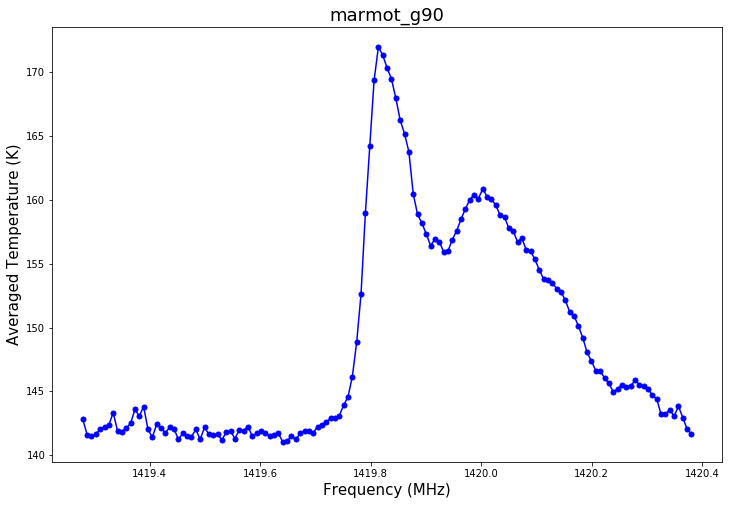

In [6]:
longs = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
fe = 1420.4

for i in longs:
    gal = np.genfromtxt("marmot_g"+str(i)+".rad",comments="*",skip_header=10)
    az = gal[:,1]
    el = gal[:,2]
    offset1, offset2 = gal[:,3], gal[:,4]
    cfq = gal[:,5]
    spacing = gal[:,6]
    mode = gal[:,7]
    channel = gal[:,8]
    data = gal[:,9:-2]
    
    newT = data[:,8:-7]
    freqs = np.linspace(cfq[0]-spacing[0]*(len(newT[0,:])/2), cfq[0]+spacing[0]*(len(newT[0,:])/2), len(newT[0,:]))  #1420Mhz +/- bandpass
    
    meanTemp = []
    for j in range(len(newT[0,:])):
        meanTemp.append(np.mean(newT[:,j]))

    plt.figure(figsize=(12,8))
    plt.plot(freqs,meanTemp,"bo-", markersize=5)
    plt.xlabel("Frequency (MHz)", fontsize=15)
    plt.ylabel("Averaged Temperature (K)", fontsize=15)
    plt.title("marmot_g"+str(i), fontsize=18)
    plt.ticklabel_format(useOffset=False)
    
#     dopVel = ((3E8)*(fe-freqs)/fe)/1000
    
#     plt.figure(figsize=(12,8))
#     plt.plot(dopVel,meanTemp,"bo-", markersize=5)
#     #plt.gca().invert_xaxis()
#     plt.xlabel("Velocity (km/s)", fontsize=15)
#     plt.ylabel("Averaged Temperature (K)", fontsize=15)
#     plt.title("marmot_g"+str(i), fontsize=18)

In [7]:
%matplotlib inline

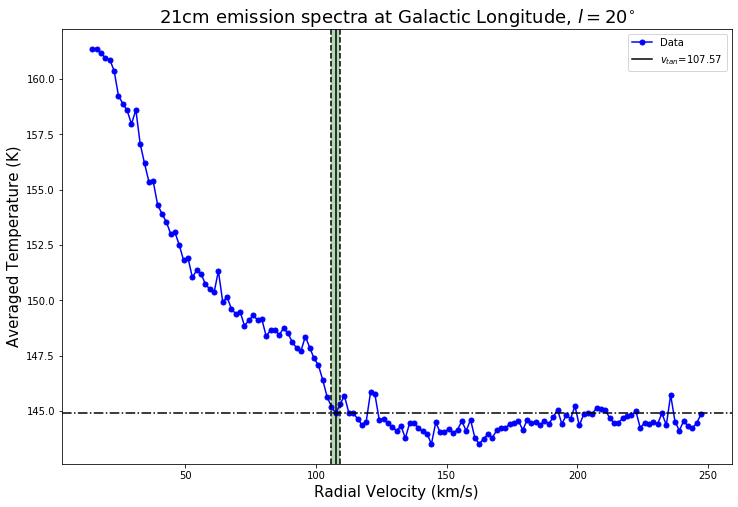

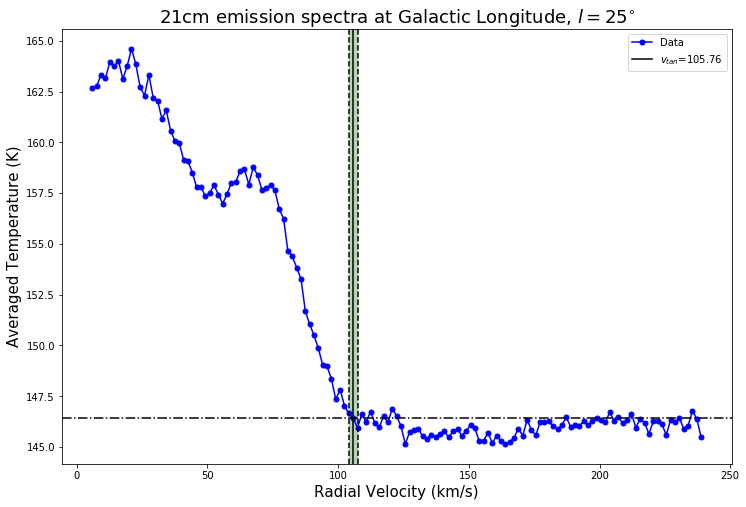

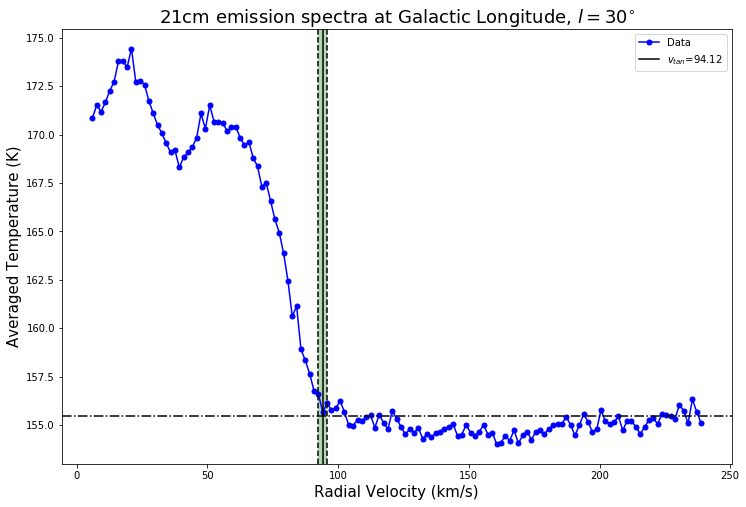

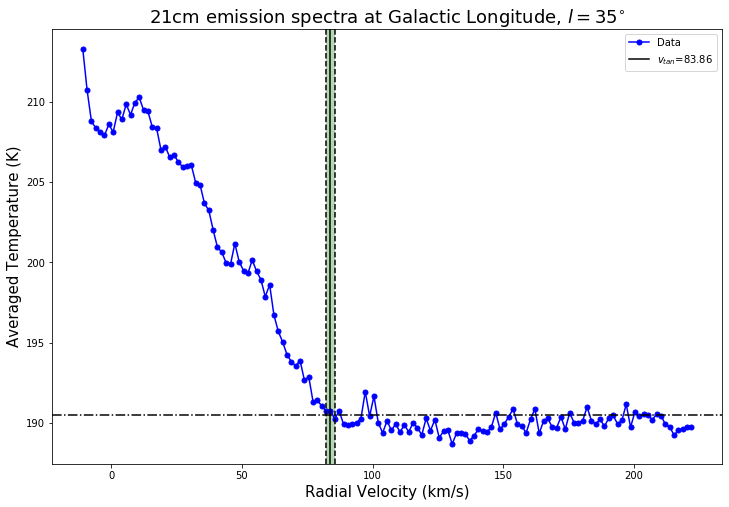

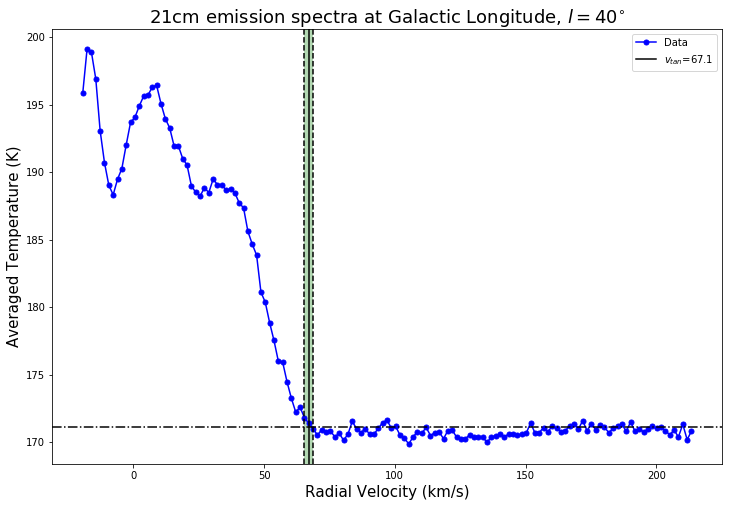

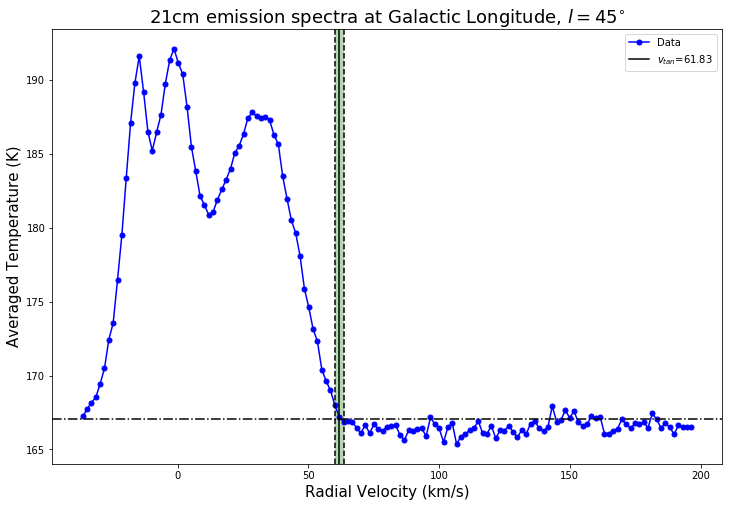

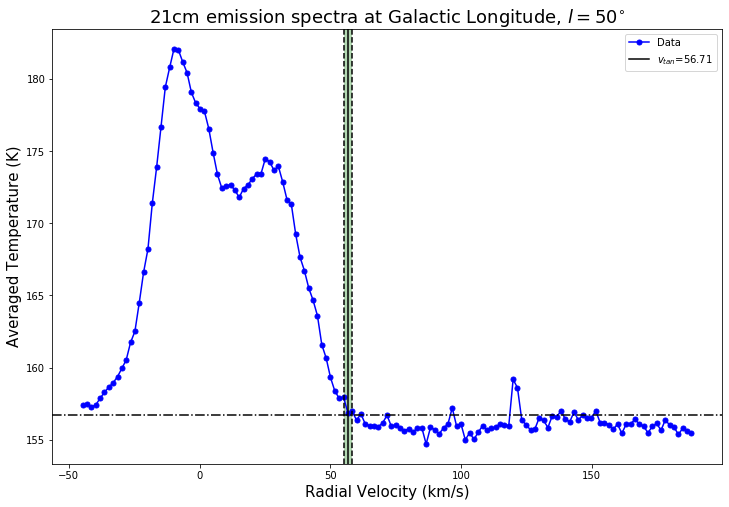

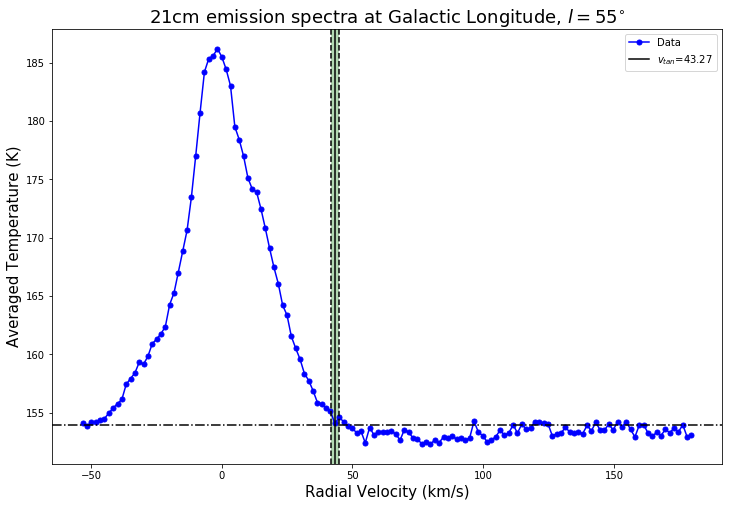

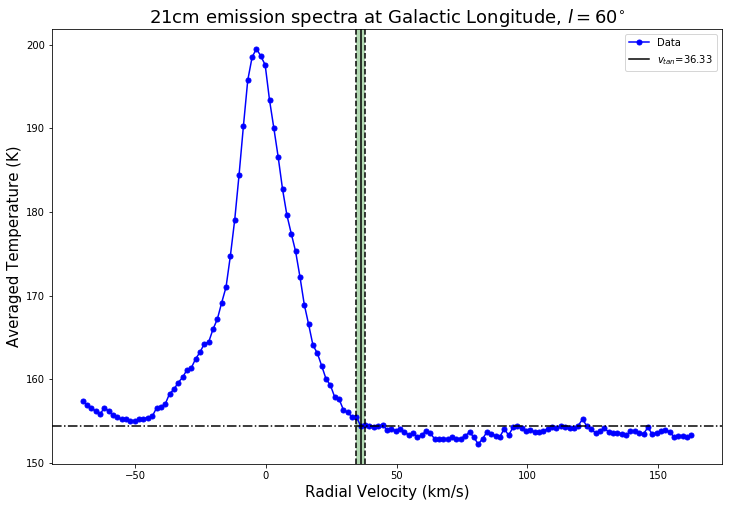

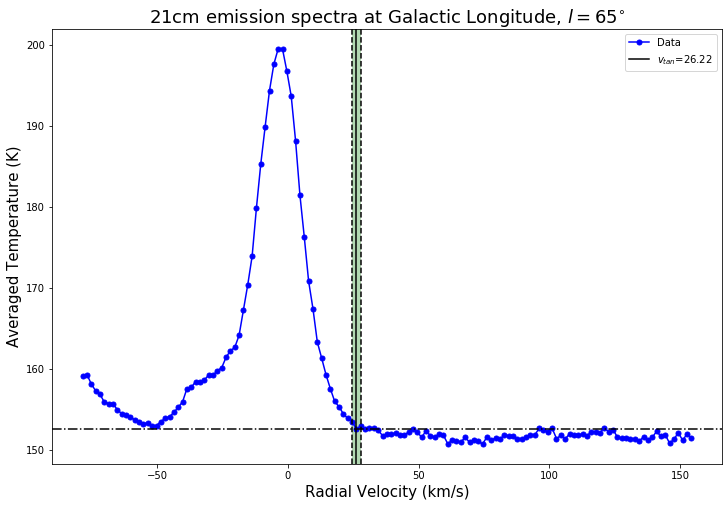

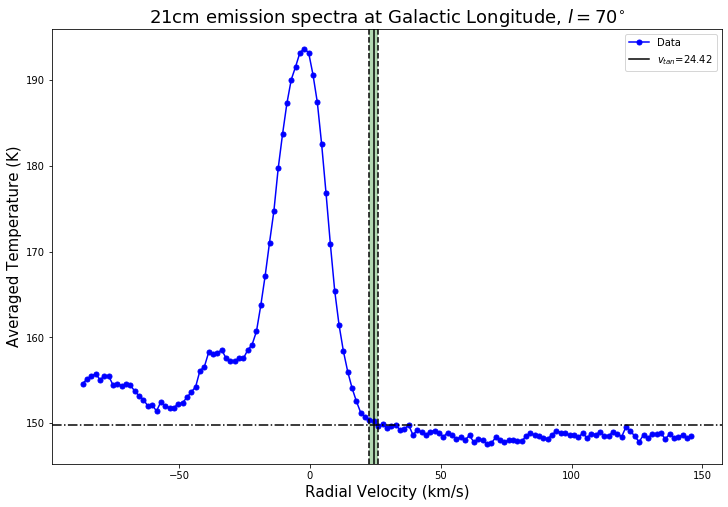

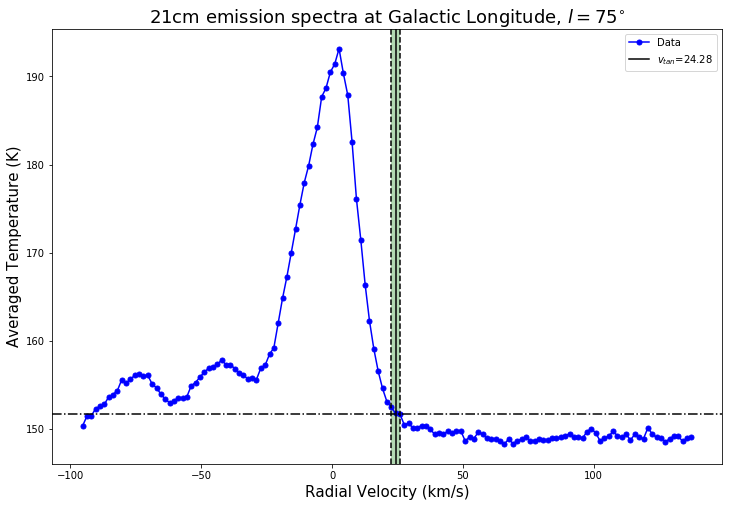

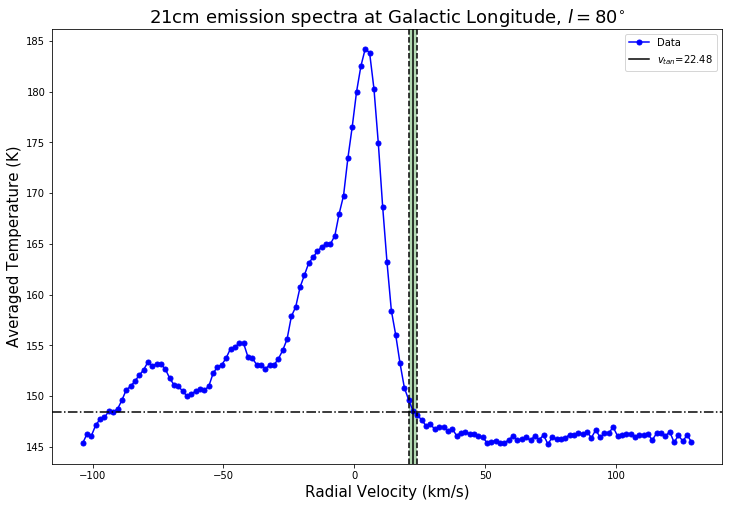

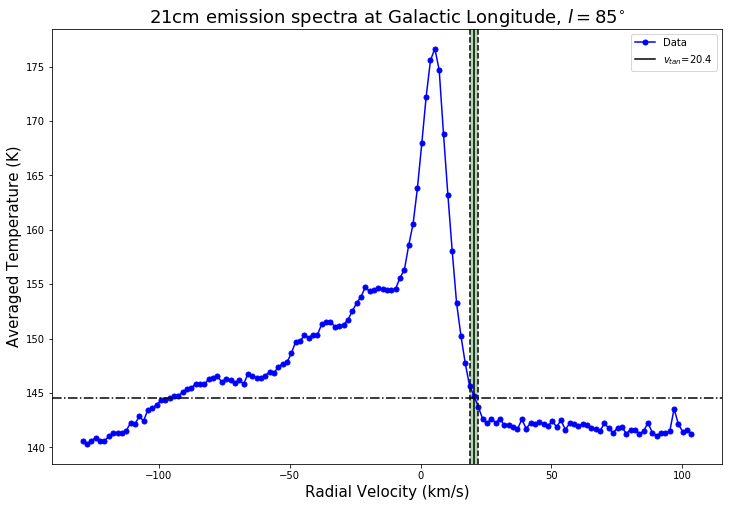

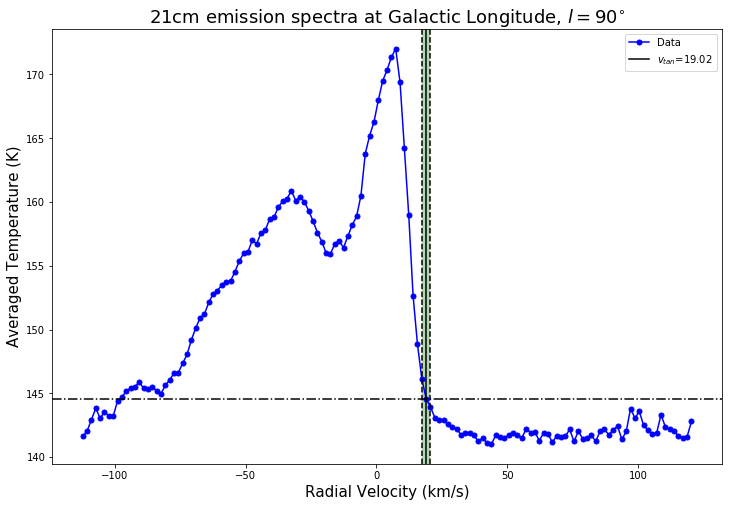

In [8]:
def allFiles(i):
    gal = np.genfromtxt("marmot_g"+str(i)+".rad",comments="*",skip_header=13)
    az = gal[:,1]
    el = gal[:,2]
    offset1, offset2 = gal[:,3], gal[:,4]
    cfq = gal[:,5]
    spacing = gal[:,6]
    mode = gal[:,7]
    channel = gal[:,8]
    data = gal[:,9:-2]
    vlsr = gal[:,-1]
    
    newT = data[:,8:-7]
    freqs = np.linspace(cfq[0], cfq[0] + spacing[0]*len(newT[0,:]), len(newT[0,:]))  #1420Mhz +/- bandpass
    #freqs = np.linspace(cfq[0]-spacing[0]*(len(newT[0,:])/2), cfq[0]+spacing[0]*(len(newT[0,:])/2), len(newT[0,:]))  # cfq +/- bandpass
    return freqs, newT, vlsr, data
    

longs = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
vTan = np.asarray([107.57, 105.76, 94.12, 83.86, 67.10, 61.83, 56.71, 43.27, 36.33, 26.22, 24.42, 24.28, 22.48, 20.40, 19.02])
f21 = 1420.40
fe = []
vlsrMean = []
vlsrStd = []


for i in range(len(longs)):
    freqs, newT, vlsr, data = allFiles(longs[i])
    vlsrMean.append(np.mean(vlsr))
    vlsrStd.append(np.std(vlsr))
    fe.append(max(cfq))
    
    meanTemp = []
    for j in range(len(newT[0,:])):
        meanTemp.append(np.mean(newT[:,j]))
    

    
#     plt.figure(figsize=(12,8))
#     plt.plot(freqs,meanTemp,"bo-", markersize=5, label="Data")
#     plt.axhline(y=np.median(meanTemp), color = "black", linestyle="-.")
#     plt.axvline(x=vTan[i], color = "black", linestyle="-", label=r"$v_{tan}$=%1s" % (vTan[i]))
#     plt.axvline(x=vTan[i]+1.66, color = "black", linestyle="--")  # uncertainty is 1 frequency bin = 1 velocity bin. dV = 1.66
#     plt.axvline(x=vTan[i]-1.66, color = "black", linestyle="--")
#     plt.axvspan(vTan[i]-1.66, vTan[i]+1.66, facecolor='g', alpha=0.3)
#     plt.xlabel("Frequency (MHz)", fontsize=15)
#     plt.ylabel("Averaged Temperature (K)", fontsize=15)
#     plt.ticklabel_format(useOffset=False)
#     plt.title("21cm emission spectra at Galactic Longitude, $l = {}$".format(str(longs[i]))+"$^{\circ}$", fontsize=18)
#     plt.legend()
#     plt.savefig("21cmLong="+str(longs[i])+"Freq.png")

    dopVel = ((3E8)*(f21-freqs)/freqs)/1000
    
#     for k in range(len(dopVel)):
#         print(dopVel[k-1]-dopVel[k])
    
    plt.figure(figsize=(12,8))
    plt.plot(dopVel,meanTemp,"bo-", markersize=5, label="Data")
    plt.axhline(y=np.median(meanTemp), color = "black", linestyle="-.")
    plt.axvline(x=vTan[i], color = "black", linestyle="-", label=r"$v_{tan}$=%1s" % (vTan[i]))
    plt.axvline(x=vTan[i]+1.66, color = "black", linestyle="--")  # uncertainty is 1 frequency bin = 1 velocity bin. dV = 1.66
    plt.axvline(x=vTan[i]-1.66, color = "black", linestyle="--")
    plt.axvspan(vTan[i]-1.66, vTan[i]+1.66, facecolor='g', alpha=0.3)
    plt.xlabel("Radial Velocity (km/s)", fontsize=15)
    plt.ylabel("Averaged Temperature (K)", fontsize=15)
    plt.title("21cm emission spectra at Galactic Longitude, $l = {}$".format(str(longs[i]))+"$^{\circ}$", fontsize=18)
    plt.legend()
    plt.savefig("21cmLong="+str(longs[i])+".png")

In [9]:
len(freqs)

141

In [10]:
# Rs = 8.07 #kpc. Average of the range from wikipedia.
# vS = 220 #km/s
# R = Rs*np.sin(np.asarray(longs)*np.pi/180)

# #fMax = np.asarray([1419.9,1419.9,1419.95,1420,1420.1,1420.1,1420.15,1420.2,1420.25,1420.3,1420.35,1420.3,1420.25,1420.25,1420.25])
# #fMax = np.asarray([1419.88,1419.90,1419.97,1420.03,1420.09,1420.09,1420.12,1420.21,1420.23,1420.29,1420.30,1420.29,1420.28,1420.27,1420.25])
# #vMax = ((3E8)*(f21-fMax)/fMax)/1000
# #vMax = np.asarray([103.6, 93.5, 81.9, 76.6, 58.2, 52.9, 47.7, 40.9, 24.0, 22.2, 17.0, 15.2, 14.9, 12.74, 9.8])

# vMax = np.asarray([107.57, 105.76, 94.12, 83.86, 67.10, 61.83, 56.71, 43.27, 36.33, 26.22, 24.42, 24.28, 22.48, 20.40, 19.02])

# vOrb = vMax + vS*np.sin(np.asarray(longs)*np.pi/180) - np.asarray(vlsrMean)

# Rerr = [0.15,0.19,0.23,0.26,0.29,0.32,0.34,0.37,0.39,0.41,0.42,0.43,0.44,0.45,0.45]

# plt.figure(figsize=(12,8))
# plt.plot(R, vOrb, "bo-")
# plt.errorbar(R, vOrb, xerr = Rerr, capsize=4, fmt=' ', color='b', alpha=0.4)                              
# plt.xlabel("Distance to galactic center (kpc)", fontsize=15)
# plt.ylabel("Velocity (km/s)", fontsize=15)
# #plt.ylim([0,300])
# plt.title("Milky Way Galactic Rotation Curve", fontsize=18)

In [11]:
Rs = 7.85 #kpc. Average of the range from wikipedia.
R = Rs*np.sin(np.asarray(longs)*np.pi/180)
rUnc = []
for i in range(len(R)):
    uncR = R[i]*(0.28/Rs)
    rUnc.append(uncR)

rUnc  # uncertainty at all radii

[0.09576564013118724,
 0.11833311328739586,
 0.14,
 0.1606014021782929,
 0.17998053071223102,
 0.19798989873223333,
 0.2144924440733139,
 0.22936257240091776,
 0.24248711305964285,
 0.253766180370262,
 0.2631139338200543,
 0.2704592313609392,
 0.2757461708434183,
 0.2789345154656888,
 0.28]

Uncertainty in $v_{tan} = v_{max} \pm 1.66$  # uncertainty for each tangent velocity is $\pm$ 1 velocity bin

In [12]:
vS = 225
vsUnc = []
allVs = vS*np.sin(np.asarray(longs)*np.pi/180)

for i in range(len(R)):
    uncVs = allVs[i]*(7.57/225)
    vsUnc.append(uncVs)

vsUnc

[2.5890924849753123,
 3.199220241377095,
 3.785,
 4.341973623177418,
 4.865902205327103,
 5.352798333582165,
 5.798956434410664,
 6.200980975267669,
 6.555812306648201,
 6.860749947867442,
 7.113473139349328,
 7.312058505008248,
 7.454994690302415,
 7.541193864554514,
 7.570000000000001]

Uncertainty in $v_{lsr} = vlsrMean[i] \pm vlsrStd[i]$

In [13]:
for i in range(len(vlsrMean)):
    print("v_lsr = {} +/- {}".format(vlsrMean[i], vlsrStd[i]))

v_lsr = -39.74155844155844 +/- 0.0305390928970372
v_lsr = -38.838441558441566 +/- 0.037279740504953945
v_lsr = -35.40644736842105 +/- 0.01964848644019623
v_lsr = -34.16657894736842 +/- 0.0317288110638193
v_lsr = -31.784342105263164 +/- 0.025820000729533464
v_lsr = -29.668026315789472 +/- 0.020775728300750446
v_lsr = -27.32960526315789 +/- 0.029309635090551376
v_lsr = -24.845526315789474 +/- 0.031178380534312346
v_lsr = -22.366710526315796 +/- 0.03237884941125438
v_lsr = -19.55802631578947 +/- 0.034679727767177336
v_lsr = -16.73486842105263 +/- 0.03683153043723558
v_lsr = -13.677631578947372 +/- 0.03793583297915992
v_lsr = -10.520394736842105 +/- 0.041340714908444307
v_lsr = -7.287105263157895 +/- 0.04198420095933593
v_lsr = -4.705974025974026 +/- 0.049654906252659115


In [14]:
vtanErr = 1.66
vOrbErr = []

for i in range(len(vlsrMean)):
    vOrbUnc = np.sqrt(vtanErr**2+vsUnc[i]**2+vlsrStd[i])
    vOrbErr.append(vOrbUnc)
    print("Orbital velocity error: {:.2f}".format(vOrbUnc))

Orbital velocity error: 3.08
Orbital velocity error: 3.61
Orbital velocity error: 4.14
Orbital velocity error: 4.65
Orbital velocity error: 5.14
Orbital velocity error: 5.61
Orbital velocity error: 6.03
Orbital velocity error: 6.42
Orbital velocity error: 6.77
Orbital velocity error: 7.06
Orbital velocity error: 7.31
Orbital velocity error: 7.50
Orbital velocity error: 7.64
Orbital velocity error: 7.72
Orbital velocity error: 7.75


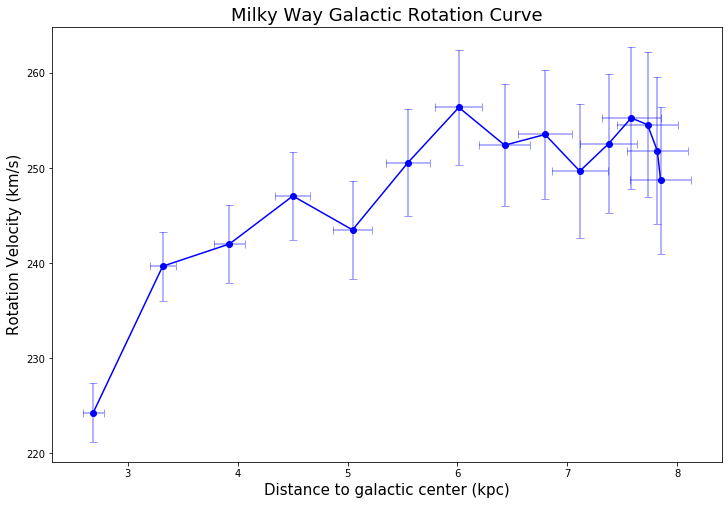

In [15]:
#fMax = np.asarray([1419.9,1419.9,1419.95,1420,1420.1,1420.1,1420.15,1420.2,1420.25,1420.3,1420.35,1420.3,1420.25,1420.25,1420.25])
#fMax = np.asarray([1419.88,1419.90,1419.97,1420.03,1420.09,1420.09,1420.12,1420.21,1420.23,1420.29,1420.30,1420.29,1420.28,1420.27,1420.25])
#vMax = ((3E8)*(f21-fMax)/fMax)/1000
#vMax = np.asarray([103.6, 93.5, 81.9, 76.6, 58.2, 52.9, 47.7, 40.9, 24.0, 22.2, 17.0, 15.2, 14.9, 12.74, 9.8])

vMax = np.asarray([107.57, 105.76, 94.12, 83.86, 67.10, 61.83, 56.71, 43.27, 36.33, 26.22, 24.42, 24.28, 22.48, 20.40, 19.02])

vOrb = vMax + vS*np.sin(np.asarray(longs)*np.pi/180) - np.asarray(vlsrMean)

Rerr = rUnc

plt.figure(figsize=(12,8))
plt.plot(R, vOrb, "bo-")
plt.errorbar(R, vOrb, xerr = Rerr, capsize=4, fmt=' ', color='b', alpha=0.4)
plt.errorbar(R, vOrb, yerr = vOrbErr, capsize=4, fmt=' ', color='b', alpha=0.4)                              
plt.xlabel("Distance to galactic center (kpc)", fontsize=15)
plt.ylabel("Rotation Velocity (km/s)", fontsize=15)
#plt.ylim([0,300])
plt.title("Milky Way Galactic Rotation Curve", fontsize=18)
plt.savefig("rotationCurve.png")

In [16]:
G = 6.67E-11
M = ((vOrb[-1]*1000)**2)*(R[-1]*3.086E19)/(G)
M #uncertainty is 1.28E40 = 0.128E41

2.2468911056521697e+41

In [17]:
(1988500)*(1E24)

1.9885e+30